**Завдання**
### Застосуйте описані в лекції методи траснформації даних на датасеті *Data_to_Transform*, який містить:
* помірно зміщені праворуч дані (Moderate Positive Skew);
* сильно зміщені праворуч дані (Highly Positive Skew);
* помірно зміщені ліворуч дані (Moderate Negative Skew);
* сильно зміщені ліворуч дані (Highly Negative Skew).
### Оцініть результати трансформацій через квантильно-квантильні графіки.

In [136]:
# Libraries are required.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm


In [137]:
# Read a dataset.
df_tranform = pd.read_csv('Data_to_Transform.csv')
df_tranform.head()


,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


In [138]:
# Details about the dataset.
df_tranform.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Moderate Positive Skew  10000 non-null  float64
 1   Highly Positive Skew    10000 non-null  float64
 2   Moderate Negative Skew  10000 non-null  float64
 3   Highly Negative Skew    10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


array([[<AxesSubplot: title={'center': 'Moderate Positive Skew'}>,
        <AxesSubplot: title={'center': 'Highly Positive Skew'}>],
       [<AxesSubplot: title={'center': 'Moderate Negative Skew'}>,
        <AxesSubplot: title={'center': 'Highly Negative Skew'}>]],
      dtype=object)

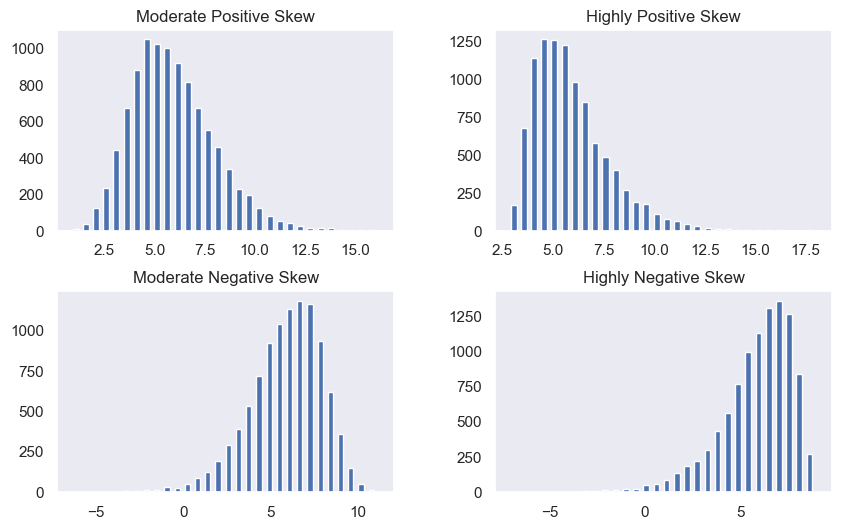

In [139]:
# Visualization of distributed data.
df_tranform.hist(grid=False, figsize=(10, 6), width=0.3, bins=30)


In [140]:
# Current skewness and kurtosis in the dataset.
df_tranform.agg(['skew', 'kurtosis']).transpose()


,skew,kurtosis
Moderate Positive Skew,0.656308,0.584120
Highly Positive Skew,1.271249,2.405999
Moderate Negative Skew,-0.690244,0.790534
Highly Negative Skew,-1.201891,2.086863


### Square Root Transformation:

In [141]:
# Creating a new column 'Square_transform' for knowing
# how will be transform dataset after using the Square root transformation function.
df_tranform.insert(len(df_tranform.columns), 'Square_transform', np.sqrt(df_tranform.iloc[:, 0]))
df_tranform


,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Square_transform
0,0.899990,2.895074,11.180748,9.027485,0.948678
1,1.113554,2.962385,10.842938,9.009762,1.055251
2,1.156830,2.966378,10.817934,9.006134,1.075560
3,1.264131,3.000324,10.764570,9.000125,1.124336
4,1.323914,3.012109,10.753117,8.981296,1.150615
...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,3.840449
9996,14.854474,16.396252,-3.147526,-3.772332,3.854150
9997,15.262103,17.102991,-3.517256,-4.717950,3.906674
9998,15.269983,17.628467,-4.689833,-5.670496,3.907683


array([[<AxesSubplot: title={'center': 'Square_transform'}>]],
      dtype=object)

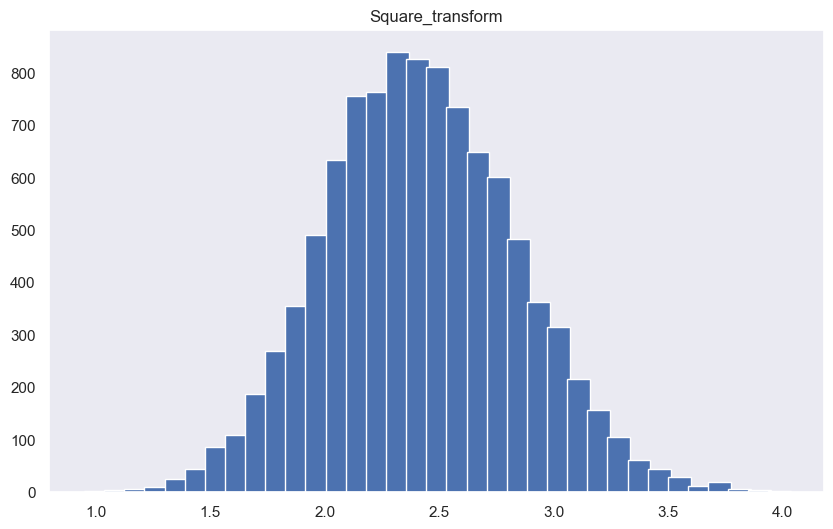

In [142]:
# Visualization the Square root transformed distribution.
df_tranform.hist(column='Square_transform', grid=False, figsize=(10, 6), width=0.1, bins=35)


### Box-Cox Transformation:

In [143]:
# Creating a column with the Box-Cox Transformation from current dataset.
df_tranform.insert(len(df_tranform.columns), 'Box-Cox_transform', boxcox(df_tranform.iloc[:, 0])[0])
df_tranform


,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Square_transform,Box-Cox_transform
0,0.899990,2.895074,11.180748,9.027485,0.948678,-0.103432
1,1.113554,2.962385,10.842938,9.009762,1.055251,0.109628
2,1.156830,2.966378,10.817934,9.006134,1.075560,0.149502
3,1.264131,3.000324,10.764570,9.000125,1.124336,0.244374
4,1.323914,3.012109,10.753117,8.981296,1.150615,0.294988
...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,3.840449,4.496676
9996,14.854474,16.396252,-3.147526,-3.772332,3.854150,4.515148
9997,15.262103,17.102991,-3.517256,-4.717950,3.906674,4.585788
9998,15.269983,17.628467,-4.689833,-5.670496,3.907683,4.587141


array([[<AxesSubplot: title={'center': 'Box-Cox_transform'}>]],
      dtype=object)

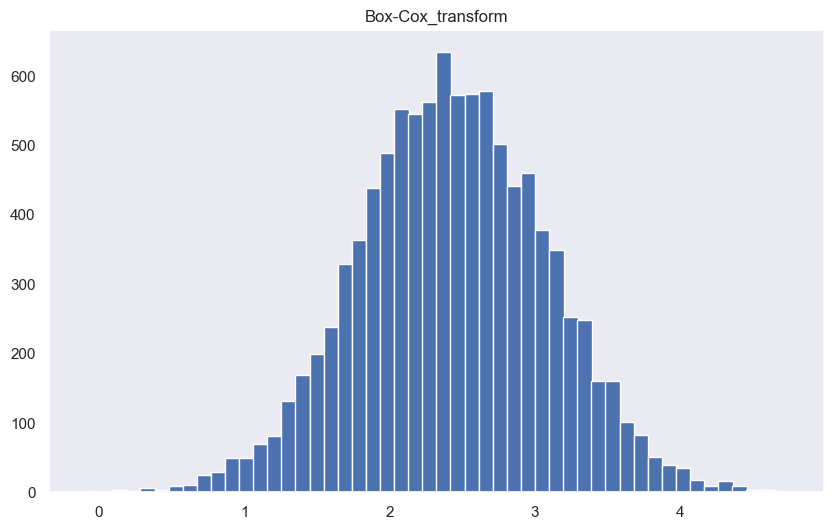

In [144]:
# Visualization the Box-Cox Transformation values.
df_tranform.hist(column='Box-Cox_transform', grid=False, figsize=(10, 6), width=0.1, bins=50)


In [145]:
# Reshaping data for Box-Cox Transformation. Box-Cox only for positive values.
data_reshape = df_tranform['Moderate Positive Skew'].values.reshape(-1, 1)

# Making Box-Cox Transformation model.
boxcox_model = PowerTransformer(method='box-cox')
df_boxcox = boxcox_model.fit_transform(data_reshape)


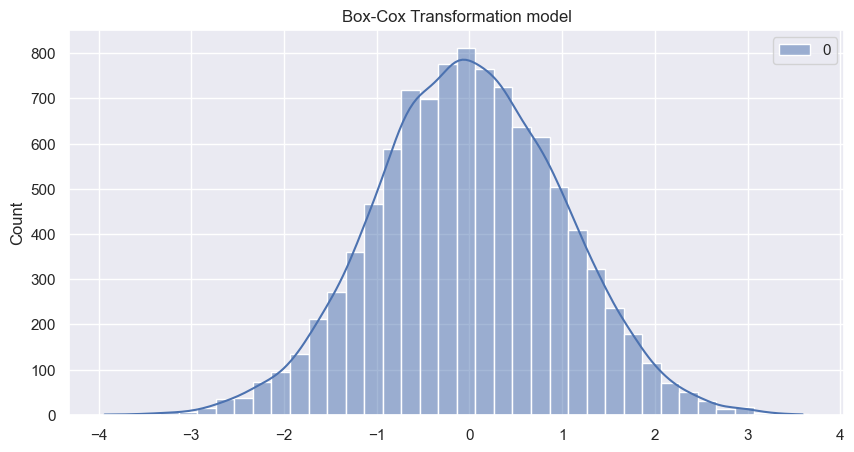

<Figure size 1000x500 with 0 Axes>

In [146]:
# Visualisation a previous result.
sns.histplot(df_boxcox, binwidth=0.2, kde=True).set(title='Box-Cox Transformation model')
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4
fig = plt.figure()


E:\Python\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


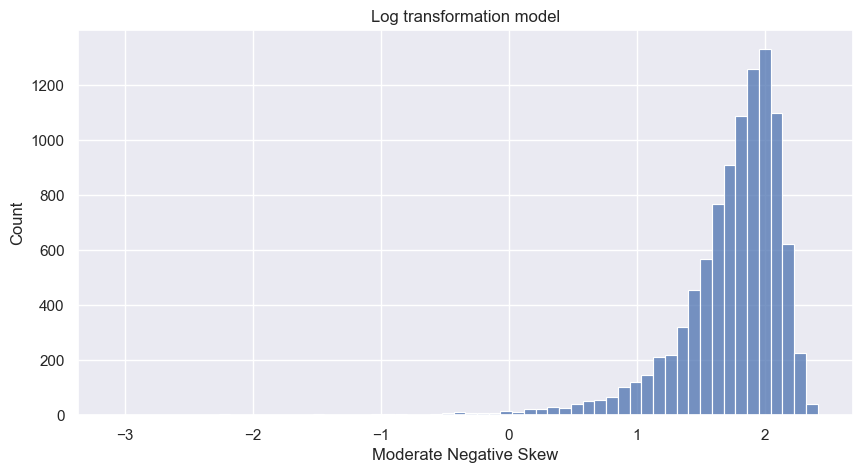

<Figure size 1000x500 with 0 Axes>

In [152]:
# Log transformation (log) for a data is moderate shifted to the left.
# Using for reducing left skewness.
df_log = np.log(df_tranform['Moderate Negative Skew'])
sns.histplot(df_log, bins=60).set(title='Log transformation model')
fig_1 = plt.figure()


### Q-Q plots:

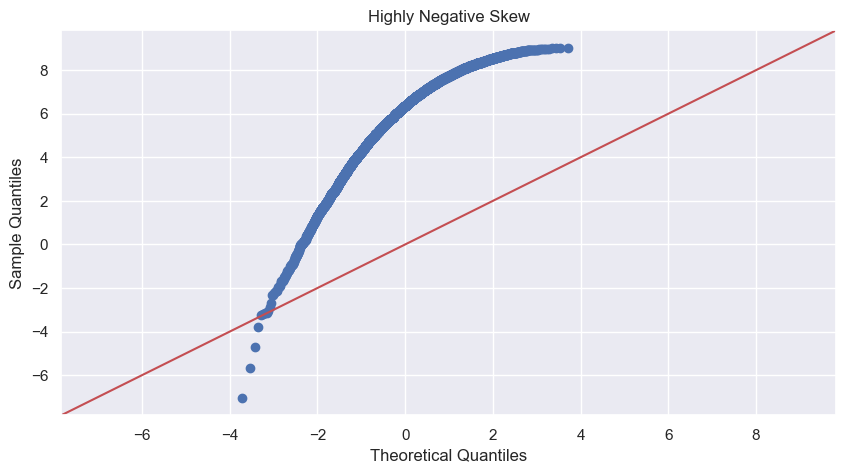

In [153]:
# Visualisation values from the column 'Highly Negative Skew'.
fig_2 = sm.qqplot(df_tranform['Highly Negative Skew'], line='45')
plt.title('Highly Negative Skew')
plt.show()


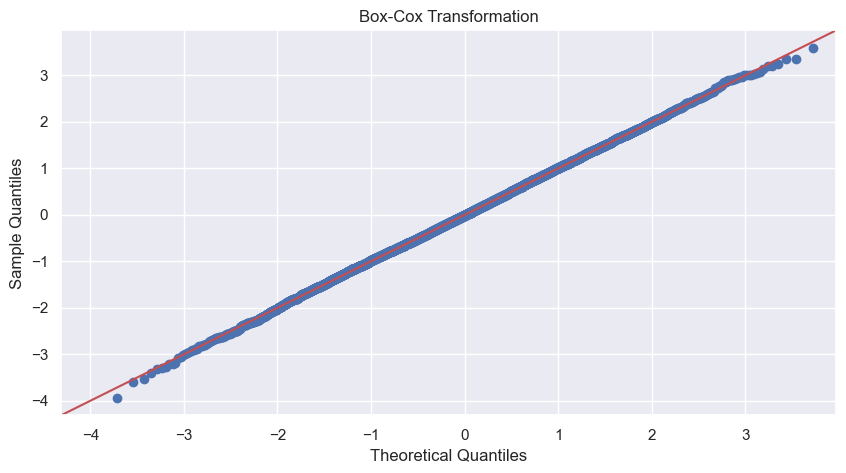

In [154]:
# Visualisation Box-Cox Transformation.
fig_3 = sm.qqplot(df_boxcox, line='45')
plt.title('Box-Cox Transformation')
plt.show()


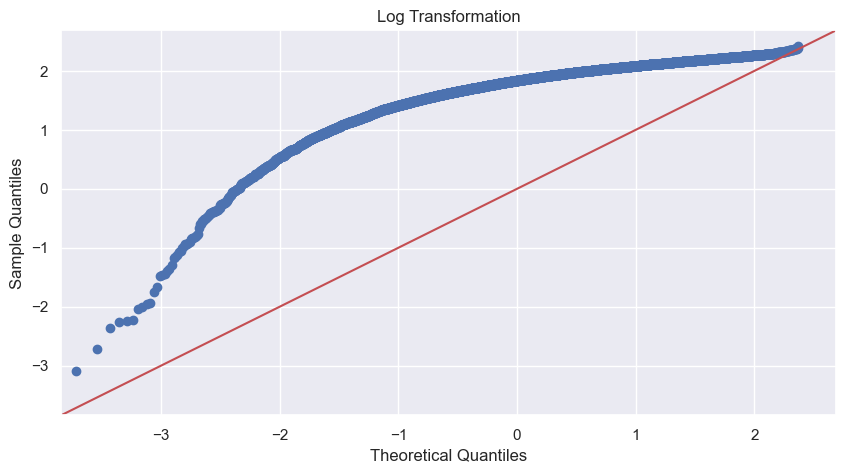

In [155]:
# Visualisation Log Transformation.
fig_4 = sm.qqplot(df_log, line='45')
plt.title('Log Transformation')
plt.show()


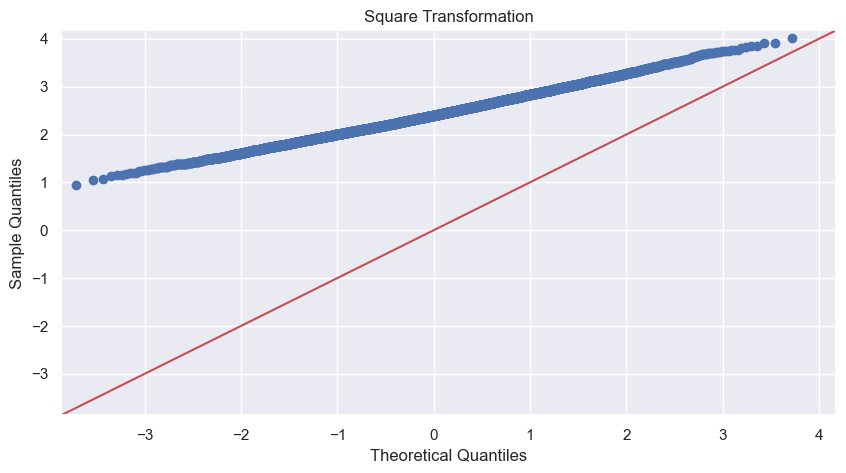

In [156]:
# Visualisation Square root transformed.
fig_5 = sm.qqplot(np.sqrt(df_tranform.iloc[:, 0]), line='45')
plt.title('Square Transformation')
plt.show()
